In [38]:
import csv

In [39]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import randint
%matplotlib inline 

In [40]:
def csv_init():
    with open('ECR.csv', 'w', encoding = 'UTF8', newline = '') as f:
        writer = csv.writer(f)
        writer.writerow(["Time", "Bias", "Current"])
    f.close()

In [41]:
def csv_write(dataRow):
    with open('ECR.csv', 'a', encoding='UTF8', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(dataRow)
    f.close()

In [42]:
with open('ECR.csv') as f:
    lines = f.read().splitlines()
f.close()

In [132]:
exp_time, exp_bias, exp_curr = [], [], []

for data in open('ECR.csv', 'r'):
    time = float(data.split(",")[0])
    bias = float(data.split(",")[1])
    current = float(data.split(",")[2].strip('""\n'))
    
    exp_time.append(time)
    exp_bias.append(bias)
    exp_curr.append(current)

Text(0.5, 0.98, 'ECR nanopore generation (15/02/2023 21:01:09)')

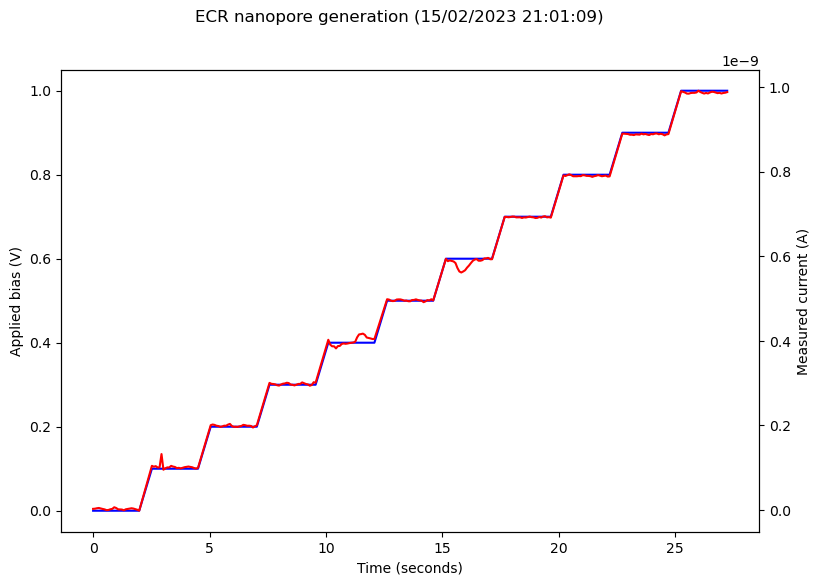

In [139]:
# datetime object containing current date and time
now = datetime.now()
dt_string = now.strftime("%d/%m/%Y %H:%M:%S")

fig, bias_ax = plt.subplots(figsize=(9,6))
curr_ax = bias_ax.twinx()
bias_ax.plot(exp_time, exp_bias, 'b')
curr_ax.plot(exp_time, exp_curr, 'r')

bias_ax.set_xlabel('Time (seconds)')
bias_ax.set_ylabel('Applied bias (V)')
curr_ax.set_ylabel('Measured current (A)')
fig.suptitle("ECR nanopore generation (" + dt_string + ")")